<h1> Data Pre-processing </h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras 
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
import seaborn as ns 

print('done')

done


In [2]:
df = pd.read_csv('C:\\Datasets\\mnist.csv')
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
x_initial = df.loc[:, df.columns != "label"]

data = np.array(x_initial)
x = []

for d in data:
    x.append(d.reshape(28,28))

x = np.array(x)

y = df["label"]

from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

print(x_test.shape, y_test.shape)
print(x_train.shape, y_train.shape)

(23100, 28, 28) (23100,)
(46900, 28, 28) (46900,)


<h3> Let's view our data </h3>

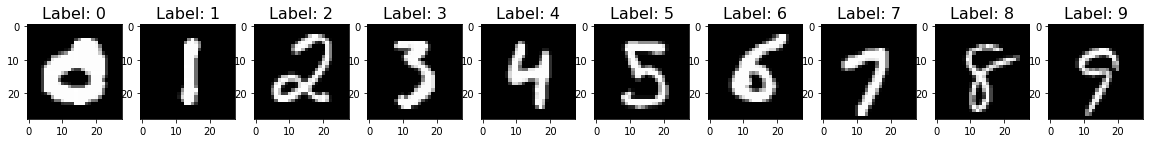

In [4]:
x, y = plt.subplots(1, 10, figsize = (20,20))

for i in range(0, 10):
    samplefig = x_train[y_train == i][0]
    y[i].imshow(samplefig, cmap = 'gray')
    y[i].set_title('Label: {}'.format(i), fontsize = 16)

In [5]:
print(y_train)

64334    9
4550     9
24098    1
34222    1
36016    6
        ..
37194    7
6265     4
54886    1
860      6
15795    7
Name: label, Length: 46900, dtype: int64


In [6]:
num_total = 10 #There are 10 possible numbes, from 0 - 9.  We want to make each one of the number a class, we want to make each prediction specific to a class
#create a vector for each one of the numbers and fill with zeroes except for the index where our number is 
y_train = keras.utils.to_categorical(y_train, num_total)
y_test = keras.utils.to_categorical(y_test, num_total)

for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<h2> Data Normalisation </h2>

In [7]:
#Normalize data 

x_train = x_train / 255.0
x_test = x_test / 255.0


In [8]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(46900, 784)


<h1> Creating Neural Networks in Keras </h1>

In [9]:
import random

activation_array = ['relu', 'sigmoid', 'tanh']
hidden_layers = [2, 3]
num_nodes = [100, 150]
num_nodes_alter = [150, 100]

models = []

for i in range(0, 3):
    for k in range(2):
        print('Activation: ', activation_array[i])
        model = Sequential()

        model.add(Dense(units = 784, input_shape = (784,), activation = activation_array[i]))
        
        for j in range(hidden_layers[k]):
            model.add(Dense(units = num_nodes[k], activation = activation_array[i]))
            
        
        model.add(Dense(units = 10, activation = 'softmax'))
        
        model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
        models.append(model)
        model.summary()
        
        print()
    
for i in range(0, 3):
    for k in range(2):
        print('Activation: ', activation_array[i])
        model = Sequential()

        model.add(Dense(units = 784, input_shape = (784,), activation = activation_array[i]))
        
        for j in range(hidden_layers[k]):
            model.add(Dense(units = num_nodes_alter[k], activation = activation_array[i]))
            
        
        model.add(Dense(units = 10, activation = 'softmax'))
        
        model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
        models.append(model)
        model.summary()
        
        print()
        
for i in range(0, 3):
        Selected_Activation = random.choice(activation_array)
        print('Activation: ', Selected_Activation)
        model = Sequential()

        model.add(Dense(units = 784, input_shape = (784,), activation = Selected_Activation))
        target_layer_1 = random.randint(70, 120)
        target_layer_2 = 150 - target_layer_1
        
        model.add(Dense(units = target_layer_1, activation = Selected_Activation))
        model.add(Dense(units = target_layer_2, activation = Selected_Activation))
            
        model.add(Dense(units = 10, activation = 'softmax'))
        
        model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
        models.append(model)
        model.summary()
        
        print()
    
        
print(len(models))

Activation:  relu
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 705,050
Trainable params: 705,050
Non-trainable params: 0
_________________________________________________________________

Activation:  relu
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Pa

<h2> Training our Models </h2>

In [10]:
epochs = 10

for i in range(len(models)):
    print("Fit Model: {}".format(i + 1))
    models[i].fit(x = x_train, y = y_train, epochs = epochs)
    print()

Fit Model: 1
Epoch 1/10
1466/1466 [==============================] - 8s 3ms/step - loss: 0.2187 - accuracy: 0.9334
Epoch 2/10
1466/1466 [==============================] - 8s 5ms/step - loss: 0.0926 - accuracy: 0.9711
Epoch 3/10
1466/1466 [==============================] - 6s 4ms/step - loss: 0.0637 - accuracy: 0.9799
Epoch 4/10
1466/1466 [==============================] - 5s 4ms/step - loss: 0.0492 - accuracy: 0.9842
Epoch 5/10
1466/1466 [==============================] - 6s 4ms/step - loss: 0.0380 - accuracy: 0.9880
Epoch 6/10
1466/1466 [==============================] - 4s 3ms/step - loss: 0.0317 - accuracy: 0.9901
Epoch 7/10
1466/1466 [==============================] - 5s 3ms/step - loss: 0.0278 - accuracy: 0.9911
Epoch 8/10
1466/1466 [==============================] - 5s 3ms/step - loss: 0.0238 - accuracy: 0.9924
Epoch 9/10
1466/1466 [==============================] - 5s 4ms/step - loss: 0.0218 - accuracy: 0.9937
Epoch 10/10
1466/1466 [==============================] - 6s 4ms/step 

<h2> Evaluation with Testing Data </h2>

In [11]:
print(x_test.shape)
print(y_test.shape)

(23100, 784)
(23100, 10)


In [13]:
test_loss = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
test_accuracy = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(len(models)):
    test_loss[i], test_accuracy[i] = models[i].evaluate(x_test, y_test)
    print("Test Loss for Model {}: {}, Test Accuracy for Model {}: {}".format(i + 1, test_loss[i], i + 1, test_accuracy[i]))
    print()

722/722 [==============================] - 2s 3ms/step - loss: 0.1135 - accuracy: 0.9760
Test Loss for Model 1: 0.11349620670080185, Test Accuracy for Model 1: 0.9759740233421326

722/722 [==============================] - 2s 2ms/step - loss: 0.1212 - accuracy: 0.9768
Test Loss for Model 2: 0.12122821062803268, Test Accuracy for Model 2: 0.9767532348632812

722/722 [==============================] - 2s 2ms/step - loss: 0.1200 - accuracy: 0.9716
Test Loss for Model 3: 0.12003445625305176, Test Accuracy for Model 3: 0.9716449975967407

722/722 [==============================] - 2s 3ms/step - loss: 0.0911 - accuracy: 0.9776
Test Loss for Model 4: 0.09113399684429169, Test Accuracy for Model 4: 0.9775757789611816

722/722 [==============================] - 2s 2ms/step - loss: 0.1066 - accuracy: 0.9723
Test Loss for Model 5: 0.10661759227514267, Test Accuracy for Model 5: 0.9722510576248169

722/722 [==============================] - 2s 2ms/step - loss: 0.1111 - accuracy: 0.9682
Test Loss f

<h2> Defining the Prediction Classes </h2>

In [14]:
y_pred = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_pred_classes = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(len(models)):
    y_pred[i] = models[i].predict(x_test)
    y_pred_classes[i] = np.argmax(y_pred[i], axis = 1)
    print(i + 1)
    print(y_pred[i])
    print(y_pred_classes[i])
    print()

722/722 [==============================] - 1s 2ms/step
1
[[7.6957898e-05 7.1951241e-04 1.2303373e-06 ... 8.6312556e-01
  6.8901434e-05 2.6271490e-02]
 [8.1661108e-07 4.0961829e-08 6.6895048e-08 ... 2.8619855e-09
  7.0145239e-07 3.1310718e-11]
 [2.0997002e-15 1.2560755e-13 2.6872203e-13 ... 1.6717361e-15
  1.8394930e-14 1.8506384e-10]
 ...
 [1.0686049e-07 4.0696460e-07 4.4799567e-08 ... 9.2838057e-09
  9.9983299e-01 3.7382390e-06]
 [1.0715442e-08 9.9996340e-01 1.8236820e-09 ... 3.4412249e-05
  2.0628236e-06 4.6340332e-08]
 [2.4895066e-19 5.8251196e-13 3.5830189e-10 ... 1.0000000e+00
  8.1821231e-15 1.9243886e-14]]
[7 6 4 ... 8 1 7]

722/722 [==============================] - 1s 1ms/step
2
[[5.8777488e-08 1.7357824e-07 2.8264203e-05 ... 9.9989188e-01
  6.1278632e-07 6.5862805e-05]
 [7.9581042e-10 1.2751697e-09 3.9427548e-11 ... 3.7315333e-13
  1.4065037e-10 2.4158566e-14]
 [9.3110502e-13 8.6037323e-12 2.0461499e-10 ... 1.1786766e-11
  3.3397191e-11 3.6058253e-07]
 ...
 [9.9772784e-05 7.0

The Model used here is: 1
Predicted: 1, True: 6


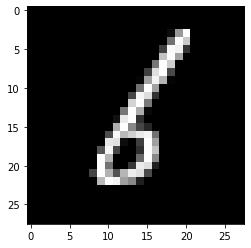

The Model used here is: 2
Predicted: 1, True: 1


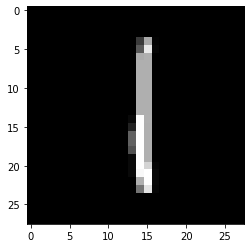

The Model used here is: 3
Predicted: 1, True: 1


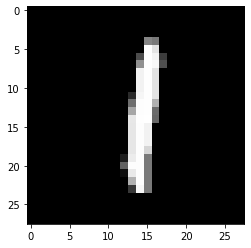

The Model used here is: 4
Predicted: 2, True: 2


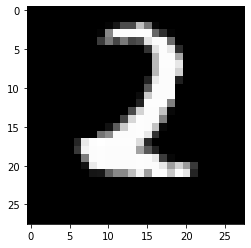

The Model used here is: 5
Predicted: 0, True: 0


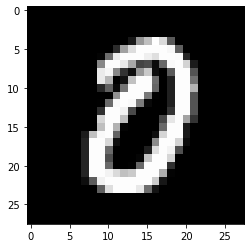

The Model used here is: 6
Predicted: 7, True: 7


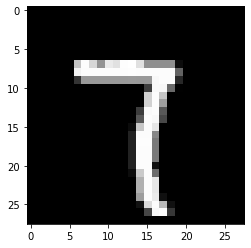

The Model used here is: 7
Predicted: 7, True: 7


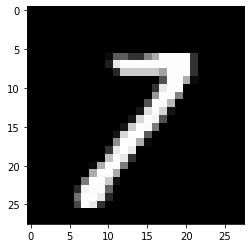

The Model used here is: 8
Predicted: 5, True: 5


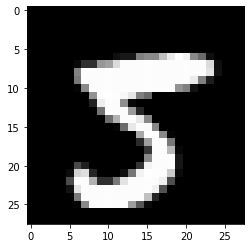

The Model used here is: 9
Predicted: 1, True: 1


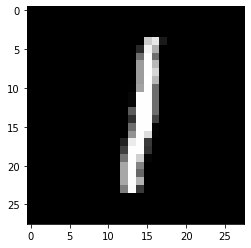

The Model used here is: 10
Predicted: 6, True: 6


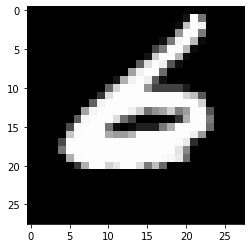

The Model used here is: 11
Predicted: 6, True: 6


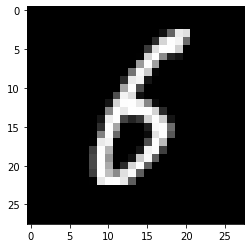

The Model used here is: 12
Predicted: 7, True: 7


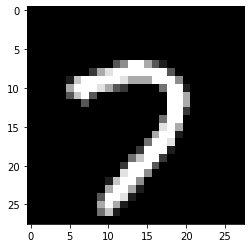

The Model used here is: 13
Predicted: 1, True: 1


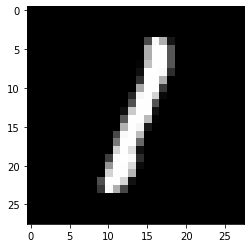

The Model used here is: 14
Predicted: 5, True: 5


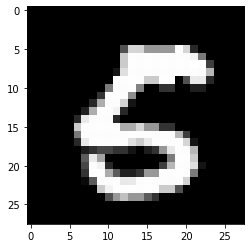

The Model used here is: 15
Predicted: 5, True: 5


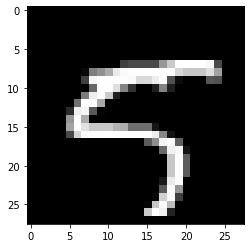

In [23]:
#Single Examples for all Models 
y_sample_pred_class = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_sample_true = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
x_sample = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_true = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(len(models)):
    random_index = np.random.choice(len(x_test))
    x_sample[i] = x_test[random_index]
    y_true[i] = np.argmax(y_test, axis = 1)
    y_sample_true[i] = y_true[i][random_index]
    y_sample_pred_class[i] = y_pred_classes[i][random_index]
    print("The Model used here is: {}".format(i + 1))
    print("Predicted: {}, True: {}".format(y_sample_pred_class[i], y_sample_true[i]),)
    plt.imshow(x_sample[i].reshape(28, 28), cmap = 'gray')
    plt.show()

<h2> Plotting Graphs </h2>

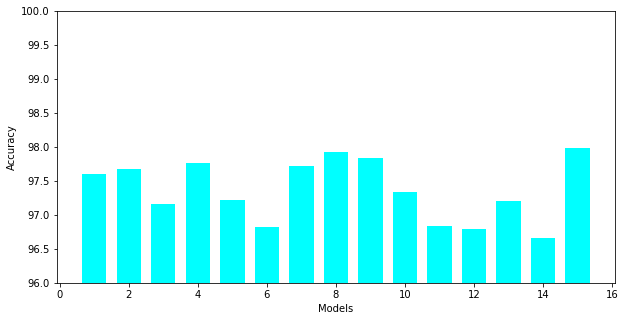

In [18]:
model_numbers = []
test_accuracy_plot = []

for i in range(len(models)):
    model_numbers.append(i + 1)
    test_accuracy_plot.append(test_accuracy[i] * 100)

fig = plt.figure(figsize = (10, 5))
plt.bar(model_numbers, test_accuracy_plot, color = 'cyan', width = 0.7)
plt.xlabel("Models")
plt.ylabel("Accuracy")

plt.ylim([96, 100])
plt.show()

<h2> Confusion Matrices </h2>

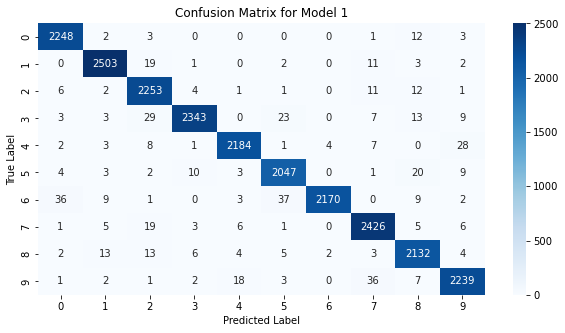

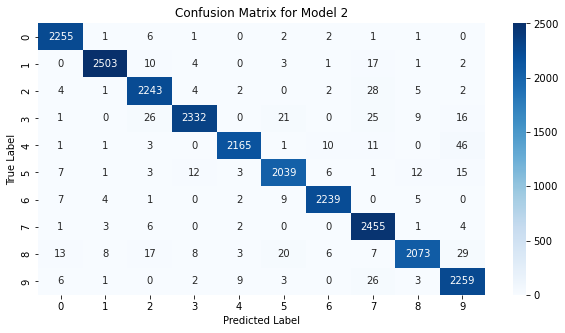

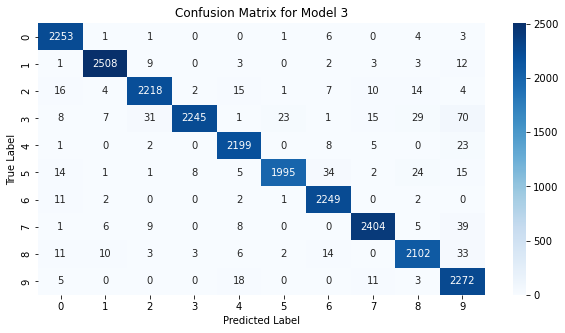

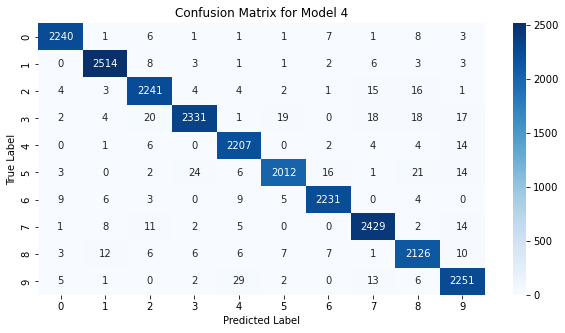

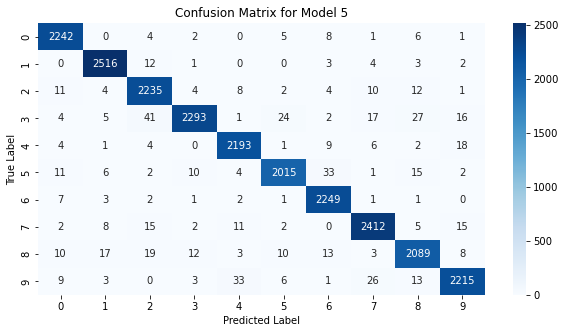

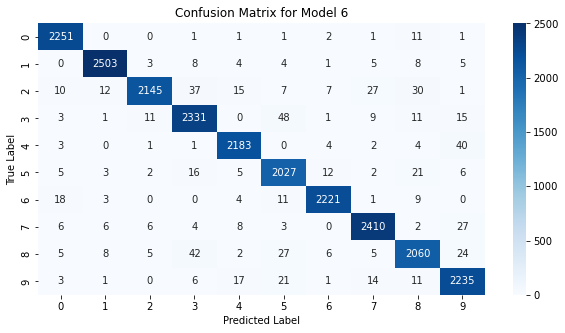

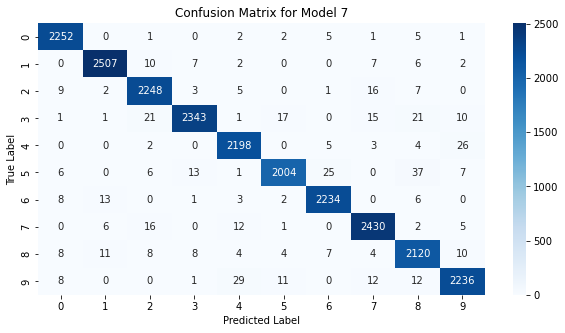

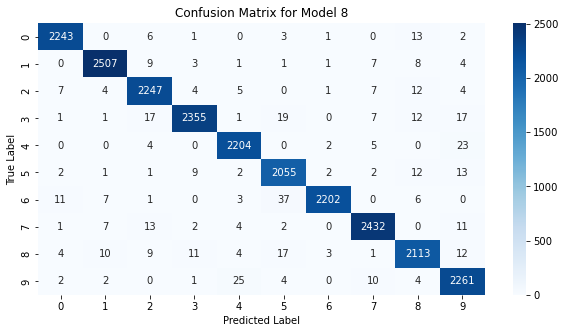

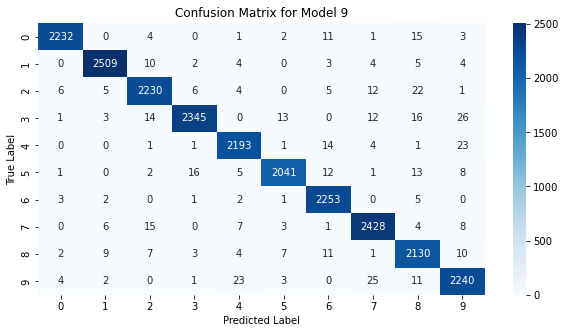

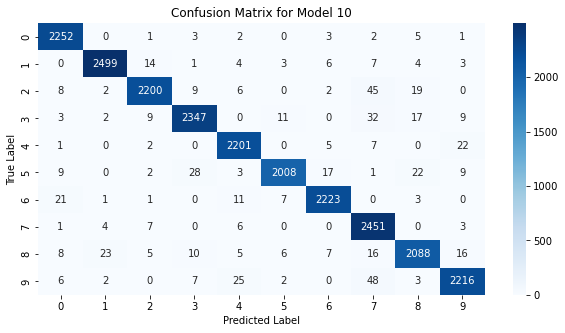

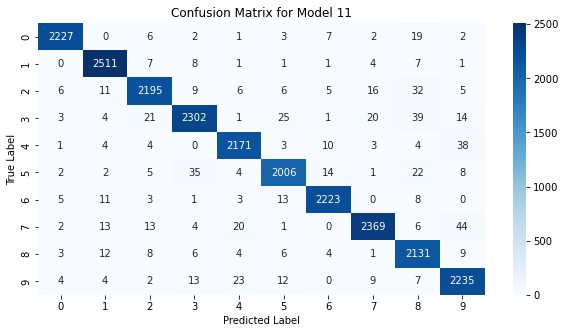

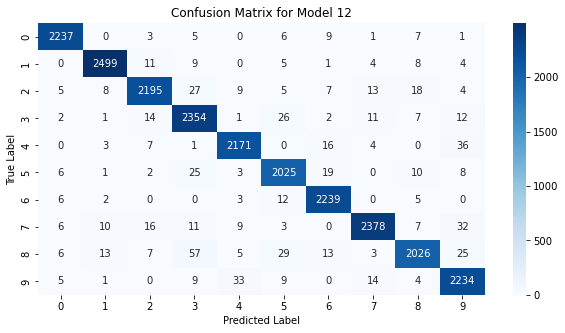

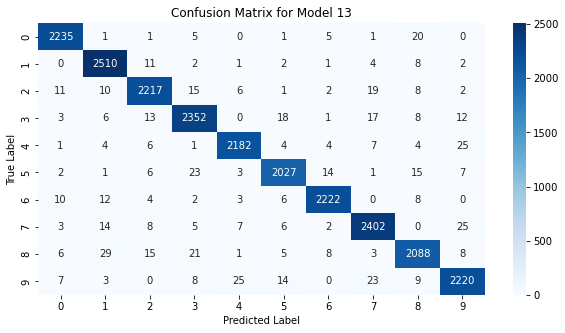

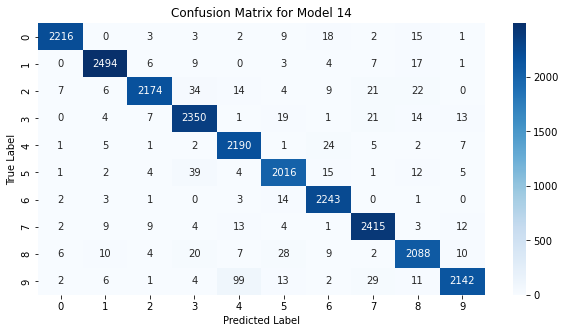

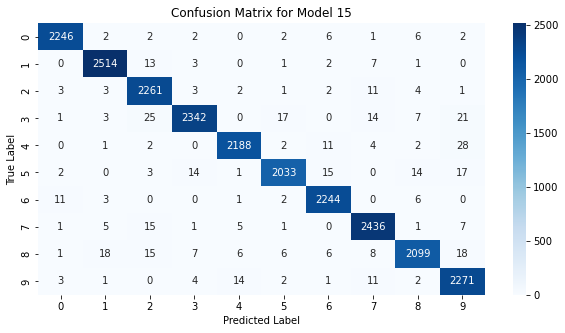

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

for i in range(len(models)):
    confusion_mtx = confusion_matrix(y_true[i], y_pred_classes[i])
    
    fig, ax = plt.subplots(figsize = (10, 5))
    ax = sns.heatmap(confusion_mtx, annot = True, fmt = 'd', ax = ax, cmap = "Blues")
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title('Confusion Matrix for Model {}'.format(i + 1))